In [ ]:
import cv2
from glob import glob

In [ ]:
# selecting and downloading resnet model
from tensorflow.keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

from tensorflow.keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
#modele.summary()

In [ ]:
from pickle import load
#fetching new_dict and inv_dict
new_dict = load(open('/content/drive/MyDrive/new_dict15000.p','rb'))
inv_dict = load(open('/content/drive/MyDrive/inv_dict1500.p','rb'))

# providing test image path
images_path = '/content/drive/MyDrive/Test Images/'
timg = glob(images_path+'*.jpg')

In [ ]:
# function for preparing test set for testing
def getImage(x):
    
    test_img_path = timg[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/MyDrive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/drive/MyDrive/model(1).h5")
print("Loaded model from disk")

Loaded model from disk


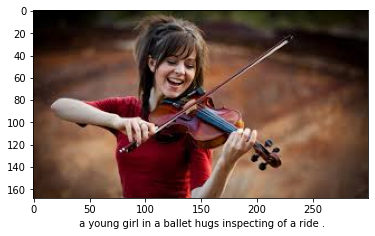

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
no = 1
test_img_path = timg[no]

test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_feature = modele.predict(getImage(no)).reshape(1,2048)
text_inp = ['startofseq']
count = 0
caption = ''
MAX_LEN = 36
while count <36:
    count +=1
    encoded = []
    for i in text_inp:
        encoded.append(new_dict[i])
    encoded = [encoded]
    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
    prediction = np.argmax(model.predict([test_feature, encoded]))
    sampled_word = inv_dict[prediction]
        
    if sampled_word == 'endofseq':
        break
    caption = caption + ' ' + sampled_word

    text_inp.append(sampled_word)
plt.imshow(test_img)
plt.imshow(test_img)
plt.xlabel(caption)
print()